In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
data = pd.read_csv('data/creditcard.csv')
data.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


<class 'pandas.core.series.Series'>


Text(0,0.5,'Frequency')

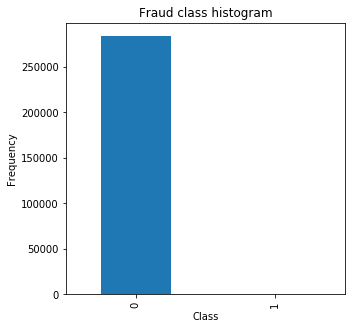

In [19]:
count_classes = pd.value_counts(data['Class'], sort=True).sort_index()
print(type(count_classes))
plt.figure(figsize=(5, 5))
count_classes.plot(kind='bar')
plt.title('Fraud class histogram')
plt.xlabel('Class')
plt.ylabel('Frequency')

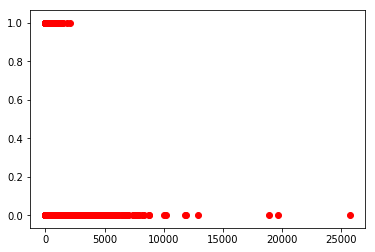

In [15]:
plt.scatter(data.Amount, data.Class, c='R')

In [21]:
from sklearn.preprocessing import StandardScaler

# 对Amount进行标准化处理
# reshape(-1, 1) 中的-1 表示大小自动识别
data['normAmount'] = StandardScaler().fit_transform(data['Amount'].reshape(-1, 1))
data = data.drop(['Time', 'Amount'], axis=1)
data.head()

d:\python\python3.6.3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [31]:
X = data.ix[:, data.columns != 'Class']
y = data.ix[:, data.columns == 'Class']

# Number of data points in the minority class
number_records_fraud = len(data[data.Class == 1])
fraud_indices = np.array(data[data.Class == 1].index)

# Picking the indices of the normal classes
normal_indices = data[data.Class == 0].index

# Out of the indices we picked, randomly select 'x' number (number_records_fraud)
random_normal_indices = np.random.choice(normal_indices, number_records_fraud, replace=False)
random_normal_indices = np.array(random_normal_indices)

# Appending the 2 indices
under_sample_indices = np.concatenate([fraud_indices, random_normal_indices])

# Under_sample dataset
under_sample_data = data.iloc[under_sample_indices]

X_undersample = under_sample_data.ix[:, under_sample_data.columns != 'Class']
y_undersample = under_sample_data.ix[:, under_sample_data.columns == 'Class']

# Showing ratio
print('Precentage of normal transactions: ', len(under_sample_data[under_sample_data.Class == 0]) / len(under_sample_data))
print('Precentage of fraud transactions: ', len(under_sample_data[under_sample_data.Class == 1]) / len(under_sample_data))
print('Total number of transactions in resampled data: ', len(under_sample_data))

Precentage of normal transactions:  0.5
Precentage of fraud transactions:  0.5
Total number of transactions in resampled data:  984


d:\python\python3.6.3\lib\site-packages\ipykernel_launcher.py:21: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


In [34]:
from sklearn.cross_validation import train_test_split

# Whole dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print('Number transactions train dataset: ', len(X_train))
print('Number transactions test dataset: ', len(X_test))
print('Total number of transactions: ', len(X_train) + len(X_test))

# Undersampled dataset
X_train_undersample, X_test_undersample, y_train_undersample, y_test_undersample = train_test_split(X_undersample,
                                                                                                    y_undersample, 
                                                                                                    test_size=0.3, 
                                                                                                    random_state=0)

print('')
print('Number transactions train dataset: ', len(X_train_undersample))
print('Number transactions test dataset: ', len(X_test_undersample))
print('Total number of transaction: ', len(X_train_undersample) + len(X_test_undersample))

Number transactions train dataset:  199364
Number transactions test dataset:  85443
Total number of transactions:  284807

Number transactions train dataset:  688
Number transactions test dataset:  296
Total number of transaction:  984


In [36]:
# Recall = TP/(TP+FN) 召回率(查全率) 模型评估方法
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold, cross_val_score
from sklearn.metrics import confusion_matrix, recall_score, classification_report

被检索到：  
**TP：**true positive.正类判定为正类  
**FP：**false positive.负类判定为正类  
未被检索到：  
**FN：**false negative.正类判定为负类  
**TN：**false negative.负类判定为负类  

eg. 某个班级有男生80人，女生20人，共计100人。目标是找出所有女生。  
现在某人挑选出60个人，其中20人是女生，另外还错误的把40个男生也当作女生挑选出来了。  
那么：  
TP=20  
FP=40  
FN=0  
TN=40  

In [88]:
def printint_Kfold_scores(x_train_data, y_train_data):
    fold = KFold(len(y_train_data), 5, shuffle=False)
    
    # Different C parameters
    c_param_range = [0.01, 0.1, 1, 10, 100]
    
    results_table = pd.DataFrame(index=range(len(c_param_range), 0), columns=['C_parameter', 'Mean recall score'])
    results_table['C_parameter'] = c_param_range
    
    # the k-fold will give 2 lists: train_indices = indices[0], test_indices = indices[1]
    j = 0
    for c_param in c_param_range:
        print('--------------------------------')
        print('C parameter: ', c_param)
        print('--------------------------------')
        print('')
        
        recall_accs = []
        for iteration, indices in enumerate(fold, start=1):
            # Call the logistic regression model with a certain C parameter
            lr = LogisticRegression(C=c_param, penalty='l1')
            
            lr.fit(x_train_data.iloc[indices[0], :], y_train_data.iloc[indices[0], :].values.ravel())
            y_pred_undersample = lr.predict(x_train_data.iloc[indices[1], :].values)
            
            recall_acc = recall_score(y_train_data.iloc[indices[1], :].values, y_pred_undersample)
            recall_accs.append(recall_acc)
            print('Iteration ', iteration, ': recall score = ', recall_acc)
            
        results_table.ix[j, 'Mean recall score'] = np.mean(recall_accs)
        results_table['Mean recall score'] = results_table['Mean recall score'].astype('float32')
        j += 1
        print('')
        print('Mean recall score ', np.mean(recall_accs))
        print('')
        
    print(results_table['Mean recall score'])
    
    best_c = results_table.loc[results_table['Mean recall score'].idxmax()]['C_parameter']
    
    print('*************************************************')
    print('Best model to choose from cross validation is with C parameter = ', best_c)
    print('*************************************************')
    
    return best_c

In [89]:
printint_Kfold_scores(X_train_undersample, y_train_undersample)

--------------------------------
C parameter:  0.01
--------------------------------

Iteration  1 : recall score =  0.931506849315
Iteration  2 : recall score =  0.917808219178
Iteration  3 : recall score =  1.0
Iteration  4 : recall score =  0.959459459459
Iteration 

d:\python\python3.6.3\lib\site-packages\ipykernel_launcher.py:30: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


 5 : recall score =  0.969696969697

Mean recall score  0.95569429953

--------------------------------
C parameter:  0.1
--------------------------------

Iteration  1 : recall score =  0.849315068493
Iteration  2 : recall score =  0.86301369863
Iteration  3 : recall score =  0.932203389831
Iteration  4 : recall score =  0.918918918919
Iteration  5 : recall score =  0.878787878788

Mean recall score  0.888447790932

--------------------------------
C parameter:  1
--------------------------------

Iteration  1 : recall score =  0.849315068493
Iteration  2 : recall score =  0.890410958904
Iteration  3 : recall score =  0.966101694915
Iteration  4 : recall score =  0.945945945946
Iteration  5 : recall score =  0.909090909091

Mean recall score  0.91217291547

--------------------------------
C parameter:  10
--------------------------------

Iteration  1 : recall score =  0.86301369863
Iteration  2 : recall score =  0.890410958904
Iteration  3 : recall score =  0.983050847458
Iteration 

0.01